In [5]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

In [6]:
def find_variable_name(value, namespace):
    for name, val in namespace.items():
        if val is value:
            return name
    return None


def plot(*imgs, lbls=None): # variable number of positional arguments *imgs (The * in this context is the unpacking or "splat" operator)
    fig = plt.figure(figsize=(10,10))
    if lbls is None:
        lbls = ['']*len(imgs)
    dim = np.ceil(np.sqrt(len(imgs))).astype(int) #  calculates the square root of the number of images, which is then used to determine the dimensions of a square grid.
    for i, (im, lbl) in enumerate(zip(imgs, lbls)): # we get both the index and the corresponding image and label
        ax = fig.add_subplot(dim,dim,i+1)
        if len(im.shape) == 2:
            ax.imshow(im, cmap='gray')
        else:
            ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(find_variable_name(im, globals()) if lbl == '' else lbl)
    plt.show()

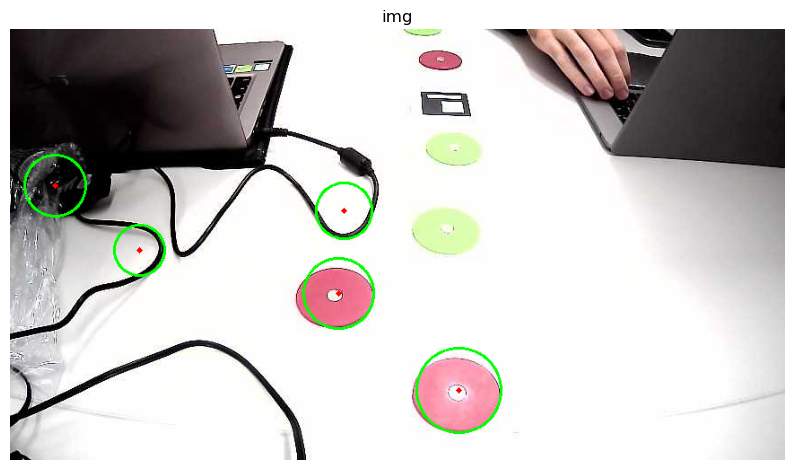

In [7]:
img = cv2.imread('disc_6.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# kernel = np.ones((3, 3), np.uint8)

# gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=2)
# gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=2)

# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray,  
                   cv2.HOUGH_GRADIENT, 1, minDist=40, param1 = 100, 
               param2 = 30, minRadius = 20, maxRadius = 50) 

# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 

plot(img)

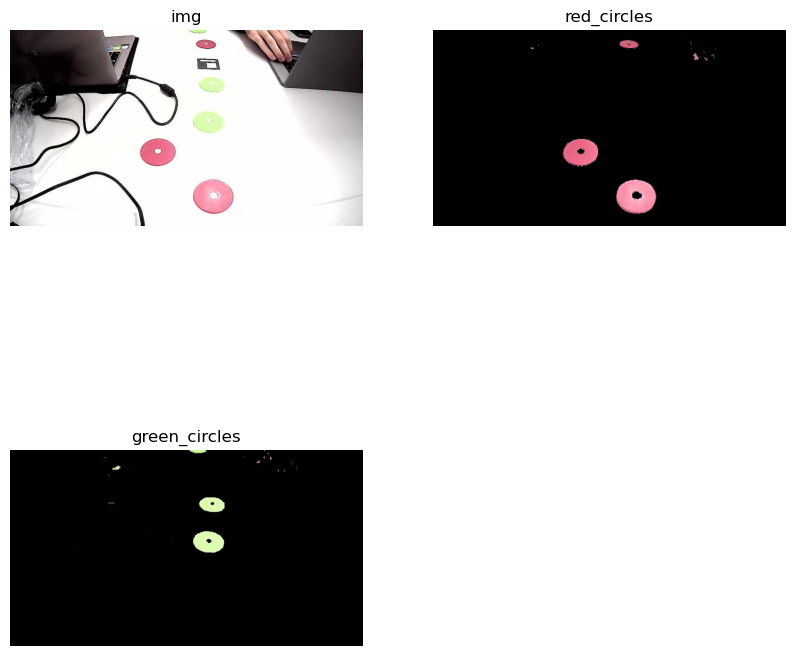

In [8]:
img = cv2.imread('disc_6.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold of blue in HSV space 
# lower_blue = np.array([60, 35, 140]) 
# upper_blue = np.array([180, 255, 255]) 

lower_red = np.array([60, 40, 150]) # HSV
upper_red = np.array([190, 190, 255]) 

hsv_green_lower = np.array([10, 40, 35])
hsv_green_upper = np.array([80, 255, 255])

mask1 = cv2.inRange(hsv, lower_red, upper_red)
mask2 = cv2.inRange(hsv, hsv_green_lower, hsv_green_upper)
# mask2 = cv2.inRange(hsv, lower_blue, upper_blue)


# The black region in the mask has the value of 0, 
# so when multiplied with original image removes all non-blue regions 
red_circles = cv2.bitwise_and(img, img, mask = mask1) 
green_circles = cv2.bitwise_and(img, img, mask = mask2)

# cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

plot(img, red_circles, green_circles)


See [here](https://www.geeksforgeeks.org/python-opencv-connected-component-labeling-and-analysis/)

Total red components: 3
Total red components: 3

Total green components: 4

Centroidi dei cerchi rossi:
 [[479.01666667  34.04833333]
 [361.48780488 298.99784792]
 [496.74626122 407.55234297]]

Centroidi dei cerchi verdi:
 [[460.41312741   2.98841699]
 [263.          43.        ]
 [494.26217843 133.42474001]
 [485.59175911 224.90618067]]


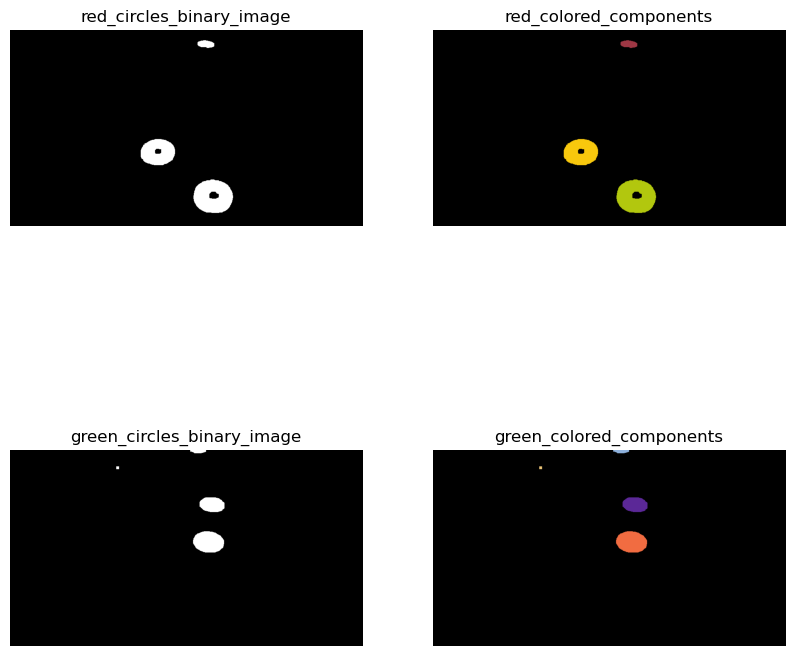

In [9]:
# Analysis of red circles

red_circles_gray = cv2.cvtColor(red_circles, cv2.COLOR_BGR2GRAY)
red_circles_gray = cv2.GaussianBlur(red_circles_gray, (5,5), 0)
_, red_circles_binary_image = cv2.threshold(red_circles_gray, 100, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
red_circles_binary_image = cv2.morphologyEx(red_circles_binary_image, cv2.MORPH_OPEN, kernel, iterations=3)
red_circles_binary_image = cv2.morphologyEx(red_circles_binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)

totalLabels_red, labels, stats, centroids_red = cv2.connectedComponentsWithStats(red_circles_binary_image,8, cv2.CV_32S) # each pixel in the binary image is assigned a label 
                                                                                                     # representing the connected component it belongs to.

colors = np.random.randint(0,255, size=(totalLabels_red,3), dtype=np.uint8) # as many random colors as labels
colors[0] = [0,0,0] # color[0] is the background

red_colored_components = colors[labels] # array broadcasting -> we obtain an array where each pixel's label in the original binary 
                                    # image is replaced by the corresponding color from the colors array.


print("Total red components:", totalLabels_red-1)

# Analysis of green circles

green_circles_gray = cv2.cvtColor(green_circles, cv2.COLOR_BGR2GRAY)
green_circles_gray = cv2.GaussianBlur(green_circles_gray, (5,5), 0)
_, green_circles_binary_image = cv2.threshold(green_circles_gray, 100, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
green_circles_binary_image = cv2.morphologyEx(green_circles_binary_image, cv2.MORPH_OPEN, kernel, iterations=3)
green_circles_binary_image = cv2.morphologyEx(green_circles_binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)

totalLabels_green, labels, stats, centroids_green = cv2.connectedComponentsWithStats(green_circles_binary_image,8, cv2.CV_32S) # each pixel in the binary image is assigned a label 
                                                                                                     # representing the connected component it belongs to.

colors = np.random.randint(0,255, size=(totalLabels_green,3), dtype=np.uint8) # as many random colors as labels
colors[0] = [0,0,0] # color[0] is the background

green_colored_components = colors[labels] # array broadcasting -> we obtain an array where each pixel's label in the original binary 
                                    # image is replaced by the corresponding color from the colors array.


print("Total red components:", totalLabels_red-1)
print("\nTotal green components:", totalLabels_green-1)

print("\nCentroidi dei cerchi rossi:\n",centroids_red[1:])
print("\nCentroidi dei cerchi verdi:\n", centroids_green[1:])


plot(red_circles_binary_image, red_colored_components, green_circles_binary_image, green_colored_components)

## Tutto insieme in una funzione

[[431.18218707 236.68536344]
 [479.01666667  34.04833333]
 [361.48780488 298.99784792]
 [496.74626122 407.55234297]]
[0, 1, 2, 3]


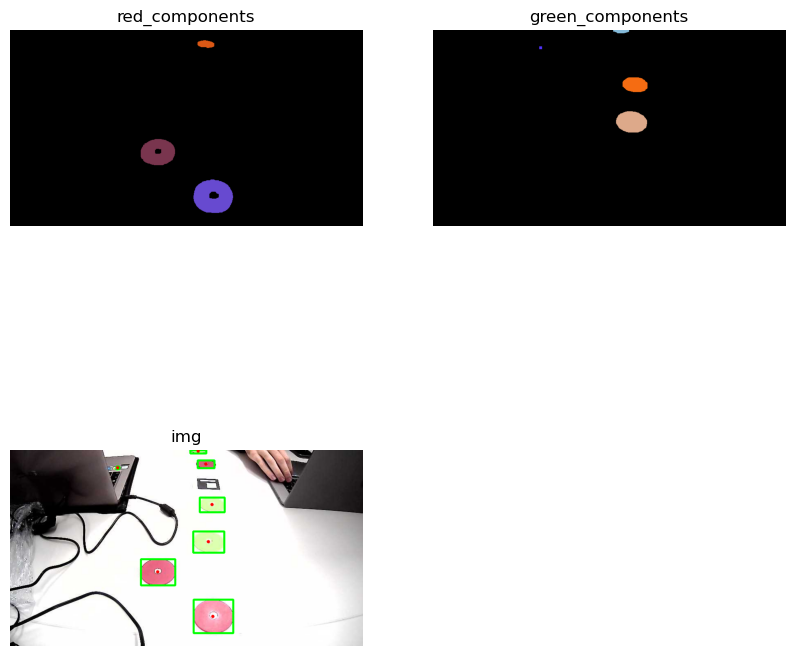

Found 4 red circles with coordinates:
 [[431.18218707 236.68536344]
 [479.01666667  34.04833333]
 [361.48780488 298.99784792]
 [496.74626122 407.55234297]]

Found 5 green circles with coordinates:
 [[430.80498986 240.25892827]
 [460.41312741   2.98841699]
 [263.          43.        ]
 [494.26217843 133.42474001]
 [485.59175911 224.90618067]]


In [10]:
def find_centroids(img, color):
    """Takes an input images and returns a list containing the x (left to right) and y (top to bottom)"""

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if color == "red":
        lower = np.array([60, 40, 150])
        upper = np.array([190, 190, 255]) 

    elif color == "green":
        lower = np.array([10, 40, 35])
        upper = np.array([80, 255, 255])

    mask = cv2.inRange(hsv, lower, upper)
 
    circles = cv2.bitwise_and(img, img, mask = mask) 

    circles_gray = cv2.cvtColor(circles, cv2.COLOR_BGR2GRAY)
    circles_gray = cv2.GaussianBlur(circles_gray, (5,5), 0)
    _, circles_binary_image = cv2.threshold(circles_gray, 100, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    circles_binary_image = cv2.morphologyEx(circles_binary_image, cv2.MORPH_OPEN, kernel, iterations=3)
    circles_binary_image = cv2.morphologyEx(circles_binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)

    totalLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(circles_binary_image,8, cv2.CV_32S) # each pixel in the binary image is assigned a label 
                                                                                                        # representing the connected component it belongs to.

    colors = np.random.randint(0,255, size=(totalLabels,3), dtype=np.uint8) # as many random colors as labels
    colors[0] = [0,0,0] # color[0] is the background

    colored_components = colors[labels] # array broadcasting -> we obtain an array where each pixel's label in the original binary 
                                        # image is replaced by the corresponding color from the colors array.


    return centroids, colored_components, totalLabels, stats
    

img = cv2.imread('disc_6.png')
centroids_red, red_components, totalLabels_red, stats_red = find_centroids(img, "red")
centroids_green, green_components, totalLabels_green, stats_green = find_centroids(img, "green")

print(centroids_red)
print([i for i in range(totalLabels_red)])

for i in range(1, totalLabels_red):
	x = stats_red[i, cv2.CC_STAT_LEFT]
	y = stats_red[i, cv2.CC_STAT_TOP]
	w = stats_red[i, cv2.CC_STAT_WIDTH]
	h = stats_red[i, cv2.CC_STAT_HEIGHT]
	area = stats_red[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids_red[i]
	img=cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
	img=cv2.circle(img, (int(cX), int(cY)), 4, (0, 0, 255), -1)


for i in range(1, totalLabels_green):
	x = stats_green[i, cv2.CC_STAT_LEFT]
	y = stats_green[i, cv2.CC_STAT_TOP]
	w = stats_green[i, cv2.CC_STAT_WIDTH]
	h = stats_green[i, cv2.CC_STAT_HEIGHT]
	area = stats_green[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids_green[i]
	img=cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)
	img=cv2.circle(img, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    
plot(red_components, green_components, img)
print(f"Found {len(centroids_red)} red circles with coordinates:\n {centroids_red}\n".format())

print(f"Found {len(centroids_green)} green circles with coordinates:\n {centroids_green}".format())
